In [48]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 


rcParams['figure.figsize'] = 15.5,10.5

# Data Adjusting 

In [49]:
# importing the data set 
beer_review_raw_data = pd.read_csv("beer_reviews.csv")
beer_review_raw_data.head() 

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [50]:
beer_review_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [51]:
# invalid users, no profile id
null_profiles = beer_review_raw_data[beer_review_raw_data['review_profilename'].isnull()] # find the number of unique entries in the dataset 
len(null_profiles)

348

In [52]:
valid_profiles = beer_review_raw_data[beer_review_raw_data['review_profilename'].notnull()]
valid_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586266 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586266 non-null  int64  
 1   brewery_name        1586251 non-null  object 
 2   review_time         1586266 non-null  int64  
 3   review_overall      1586266 non-null  float64
 4   review_aroma        1586266 non-null  float64
 5   review_appearance   1586266 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586266 non-null  object 
 8   review_palate       1586266 non-null  float64
 9   review_taste        1586266 non-null  float64
 10  beer_name           1586266 non-null  object 
 11  beer_abv            1518493 non-null  float64
 12  beer_beerid         1586266 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.4+ MB


In [53]:
valid_entries = valid_profiles[valid_profiles['brewery_name'].notnull()]
valid_entries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586251 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586251 non-null  int64  
 1   brewery_name        1586251 non-null  object 
 2   review_time         1586251 non-null  int64  
 3   review_overall      1586251 non-null  float64
 4   review_aroma        1586251 non-null  float64
 5   review_appearance   1586251 non-null  float64
 6   review_profilename  1586251 non-null  object 
 7   beer_style          1586251 non-null  object 
 8   review_palate       1586251 non-null  float64
 9   review_taste        1586251 non-null  float64
 10  beer_name           1586251 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1586251 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.4+ MB


In [54]:
df = valid_entries.drop('beer_abv', 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586251 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586251 non-null  int64  
 1   brewery_name        1586251 non-null  object 
 2   review_time         1586251 non-null  int64  
 3   review_overall      1586251 non-null  float64
 4   review_aroma        1586251 non-null  float64
 5   review_appearance   1586251 non-null  float64
 6   review_profilename  1586251 non-null  object 
 7   beer_style          1586251 non-null  object 
 8   review_palate       1586251 non-null  float64
 9   review_taste        1586251 non-null  float64
 10  beer_name           1586251 non-null  object 
 11  beer_beerid         1586251 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 157.3+ MB


/tmp/ipykernel_6589/3500408041.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = valid_entries.drop('beer_abv', 1)


In [55]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,64883


# Data Exploration

In [56]:
styles = df['beer_style'].value_counts()
styles.sort_values
styles.tail(10)

Lambic - Unblended                 1114
Sahti                              1061
Bière de Champagne / Bière Brut    1046
Braggot                            1040
English Pale Mild Ale               699
Gose                                686
Faro                                608
Roggenbier                          466
Kvass                               297
Happoshu                            241
Name: beer_style, dtype: int64

In [67]:
len(styles)

104

<AxesSubplot:>

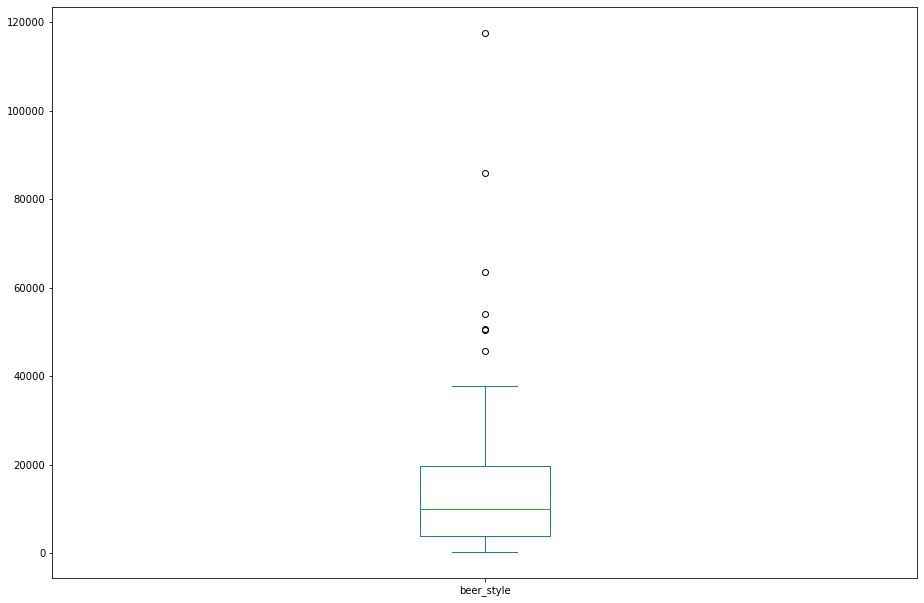

In [66]:
styles.plot(kind = 'box')

In [80]:
names = df['beer_name'].value_counts()
names.sort_values
names.head(10)

90 Minute IPA                          3289
India Pale Ale                         3130
Old Rasputin Russian Imperial Stout    3110
Sierra Nevada Celebration Ale          2999
Two Hearted Ale                        2727
Arrogant Bastard Ale                   2702
Stone Ruination IPA                    2702
Sierra Nevada Pale Ale                 2587
Stone IPA (India Pale Ale)             2574
Pliny The Elder                        2527
Name: beer_name, dtype: int64

In [73]:
len(names) #56,847 unique kinds of beer 

56847

<AxesSubplot:ylabel='Density'>

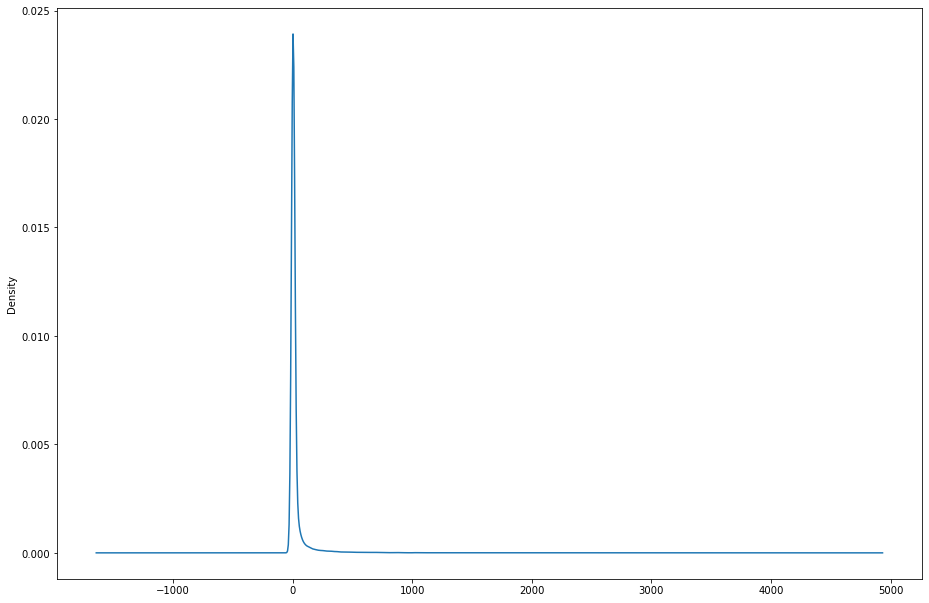

In [83]:
names.plot(kind='kde') # most beers have very few reviews, only some have alot 

## Distribution of aroma reviews

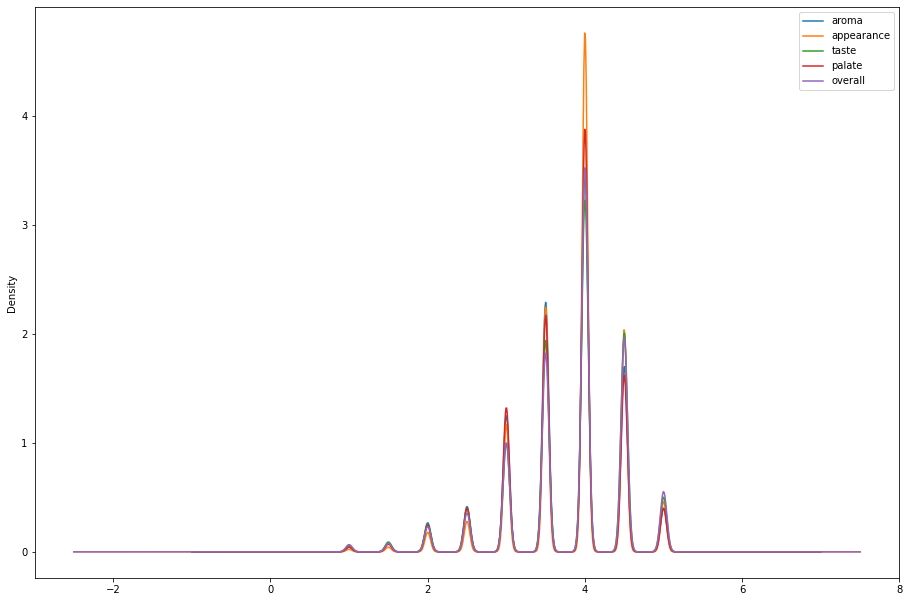

In [94]:
aroma = df['review_aroma']
ax = aroma.plot(kind='kde')
appearance = df['review_appearance']
appearance.plot(kind='kde', ax=ax)
taste = df['review_taste']
taste.plot(kind='kde', ax=ax)
palate = df['review_palate']
palate.plot(kind='kde', ax=ax)
overall = df['review_overall']
overall.plot(kind='kde', ax=ax)

ax.legend(['aroma', 'appearance', 'taste', 'palate', 'overall'])

## How do the ratings distribution compare with each other? 

In [ ]:
plt.figure(figsize=(18, 5))
sns.displot(beer_reviews_normalised, x="review_overall", binwidth=0.12)

In [ ]:
# trying to visualise correlation between the different review scores 
sns.displot(beer_reviews_normalised, x="review_overall", y="review_aroma", binwidth=(0.12,0.12), cbar=True)

In [ ]:
beer_count = beer_reviews_normalised["beer_style"].value_counts()

In [ ]:
beer_count.plot.bar()

In [ ]:
list_of_beer_styles = beer_reviews_normalised["beer_style"].unique()

## apply filter to select the 50 most popular beers (in terms of review numbers)

In [ ]:
i = 0
NumDatasets = 20
list_of_beer_datasets = [0]*NumDatasets
while i < NumDatasets: 
    list_of_beer_datasets[i] = beer_reviews_normalised.loc[beer_reviews_normalised["beer_style"] == list_of_beer_styles[i]]
    i += 1
    

In [ ]:
list_of_beer_datasets[0]["review_profilename"].unique().shape

In [ ]:
hefeweizen_beer_count = list_of_beer_datasets[0]["beer_name"].value_counts()

In [ ]:
hefeweizen_beer_count.plot.bar()